# Cocktail Data Analysis

### Import Raw Data Set

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv("Cocktail_Data.csv")

#### Data Type Change

Our list data are saved into string data. We should convert this back... Should have saved this into pickle

In [3]:
type(raw_data["Nu Mai Tai"][0])

str

In [4]:
from ast import literal_eval

In [5]:
raw_data = raw_data.transpose().iloc[1:,]
raw_data.columns = ["base","flavor","type","strength","ingredients"]

In [6]:
def converter(df,l):
    """convert string type data to list
    
    
    arguments:
    
    # pd.DataFrame
    df -- dataframe of the column
    
    # string
    l  -- name of column; a list of strings that you want to convert to a list of lists
    
    
    example:
    converter(df, ["['hello']" , "['hi','bye']", "['what']"])
    
    result: 
    returns dataframe with modified column
    
    ex)[In ]:     df[l] 
       [Out ]:   [["hello"], ["hi","bye"] , ["what"]]
    
    """
    list_of_strings = df[l].tolist()
    df[l] = [literal_eval(x) for x in list_of_strings]
    
    return df

In [7]:
for column in ["base","flavor","ingredients"]:
    converter(raw_data,column)

Check the conversion

In [8]:
type(raw_data.loc["Nu Mai Tai"][0])

list

In [9]:
raw_data = raw_data.transpose()
raw_data

,Gin Sonic,Hailey’s Comet,Tennessee Summertide,Sugar Baby,Miamian’s Julep,Cabana Club,Holy Water,Banana Daiquiri,Amanyara Mojito,Honeysuckle,...,Moon Mountain Greyhound,Citrus Flower Sour,The Irish Car Bomb,Flaming Dr. Pepper Shot,"""Plumdog"" Millionaire",New Year’s Sparkler,Finlandia Vodka Wild Berritini,VeeV Holiday Highball,Tropical Sunset,Hydrate
base,[Gin],"[Bourbon / American Whiskey, Whiskey]","[Bourbon / American Whiskey, Whiskey]","[Bourbon / American Whiskey, Whiskey]","[Bourbon / American Whiskey, Whiskey]",[Sherry],[Rum],[Rum],[Rum],[Rum],...,[Vodka],[Vodka],"[Beer, Irish Whiskey, Liqueurs]","[Beer, Liqueurs, Rum]",[Gin],[Vodka],[Vodka],[Liqueurs],[Vodka],[Vodka]
flavor,[Bubbly],[Sweet],[Spirit-forward],[Herbaceous],"[Creamy, Herbaceous]",[Sweet],"[Fruity/Citrus-forward, Spicy]","[Fruity/Citrus-forward, Sweet]","[Herbaceous, Sweet]","[Fruity/Citrus-forward, Sweet]",...,"[Fruity/Citrus-forward, Sweet]","[Fruity/Citrus-forward, Sour, Sweet]","[Bubbly, Spirit-forward]","[Bubbly, Spirit-forward]","[Salty/Savory, Spirit-forward]","[Fruity/Citrus-forward, Sweet]","[Fruity/Citrus-forward, Sweet]",[Fruity/Citrus-forward],[Fruity/Citrus-forward],[Fruity/Citrus-forward]
type,Modern Classics,Frozen / Blended,Frozen / Blended,Frozen / Blended,Frozen / Blended,Tiki / Tropical,Tiki / Tropical,Tiki / Tropical,Classics,Modern Classics,...,Modern Classics,Modern Classics,Classics,Shots,Modern Classics,Modern Classics,Modern Classics,Modern Classics,Tiki / Tropical,Modern Classics
strength,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,...,Medium,Medium,Medium,Medium,Strong,Medium,Medium,Medium,Medium,Medium
ingredients,"[1 1⁄2 oz@Roku gin, 2 1⁄4 oz@Club soda, 2 1⁄4 ...","[1 oz@Peach-infused bourbon*, 3⁄4 oz@Pimm’s bl...",[1 1⁄2 oz@Chattanooga 1816 Cask unfiltered bar...,"[1@Large seedless watermelon, 1 cup@Bourbon, 1...","[2 oz@Woodinville bourbon, 1 oz@Coconut cream,...","[1 1⁄2 oz@Amontillado sherry, 1 oz@Fresh cocon...",[3⁄4 oz@Infused Hamilton Jamaican gold rum or ...,"[2 oz@Aged rum, 1⁄2 oz@Tempus Fugit crème de b...","[2 oz@Bacardí Superior light rum, 1 oz@Fresh l...","[2 oz@Angostura seven-year-old rum, 3⁄4 oz@Fre...",...,[1 1⁄4 oz@Moon Mountain Wild Raspberry Flavore...,[1 1⁄4 oz@Moon Mountain Coastal Citrus Flavore...,"[1⁄2 oz@Baileys Irish cream, 1⁄2 oz@Irish whis...","[3⁄4 oz@Amaretto, 1⁄4 oz@Rum]","[2 oz@Bulldog GIn, 1 oz@Japanese plum wine, 1 ...","[1 oz@Berry-flavored vodka, 1 1⁄2 oz@Pomegrana...","[3⁄4 oz@Finlandia Wild Berries Fusion Vodka, 1...","[2 oz@VeeV Açaí Spirit, 1⁄4 oz@Green Chartreus...","[1 1⁄2 oz@Van Gogh Pineapple Vodka, 1 oz@Van G...","[2 oz@Organic cucumber vodka, 2 1⁄2 oz@Puréed ..."


In [10]:
pd.to_pickle(raw_data, "./cocktail_pickle")

In [11]:
df = pd.read_pickle("cocktail_pickle")

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [12]:
df.T.describe()

,base,flavor,type,strength,ingredients
count,2219,2219,2219,2219,2219
unique,202,124,11,4,2208
top,[Rum],[Spirit-forward],Modern Classics,Medium,[]
freq,280,335,1336,1562,4


#### Flavor distribution, statistics

In [13]:
df = df.T

In [14]:
all_flavs = []
for x in df["flavor"].tolist():
    all_flavs += x
print("There are total {} of flavors".format(len(set(all_flavs))))

There are total 12 of flavors


In [15]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

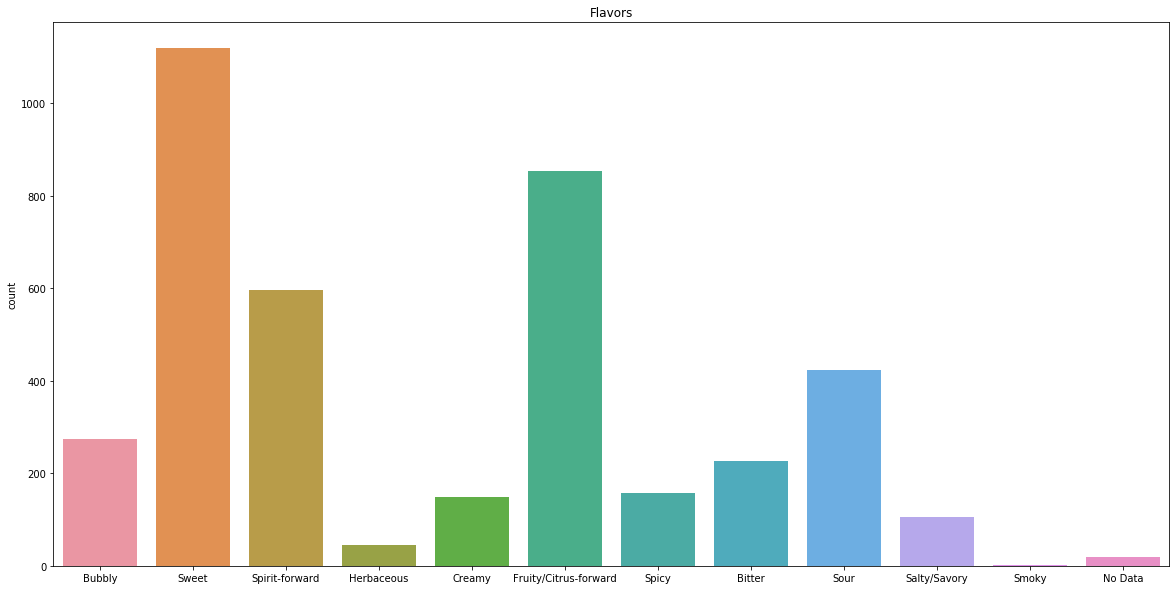

In [17]:
plt.figure(figsize=(20,10))
plt.title("Flavors")
sns.countplot(all_flavs)

#### Base Spirit

There are total 12 of base spirits


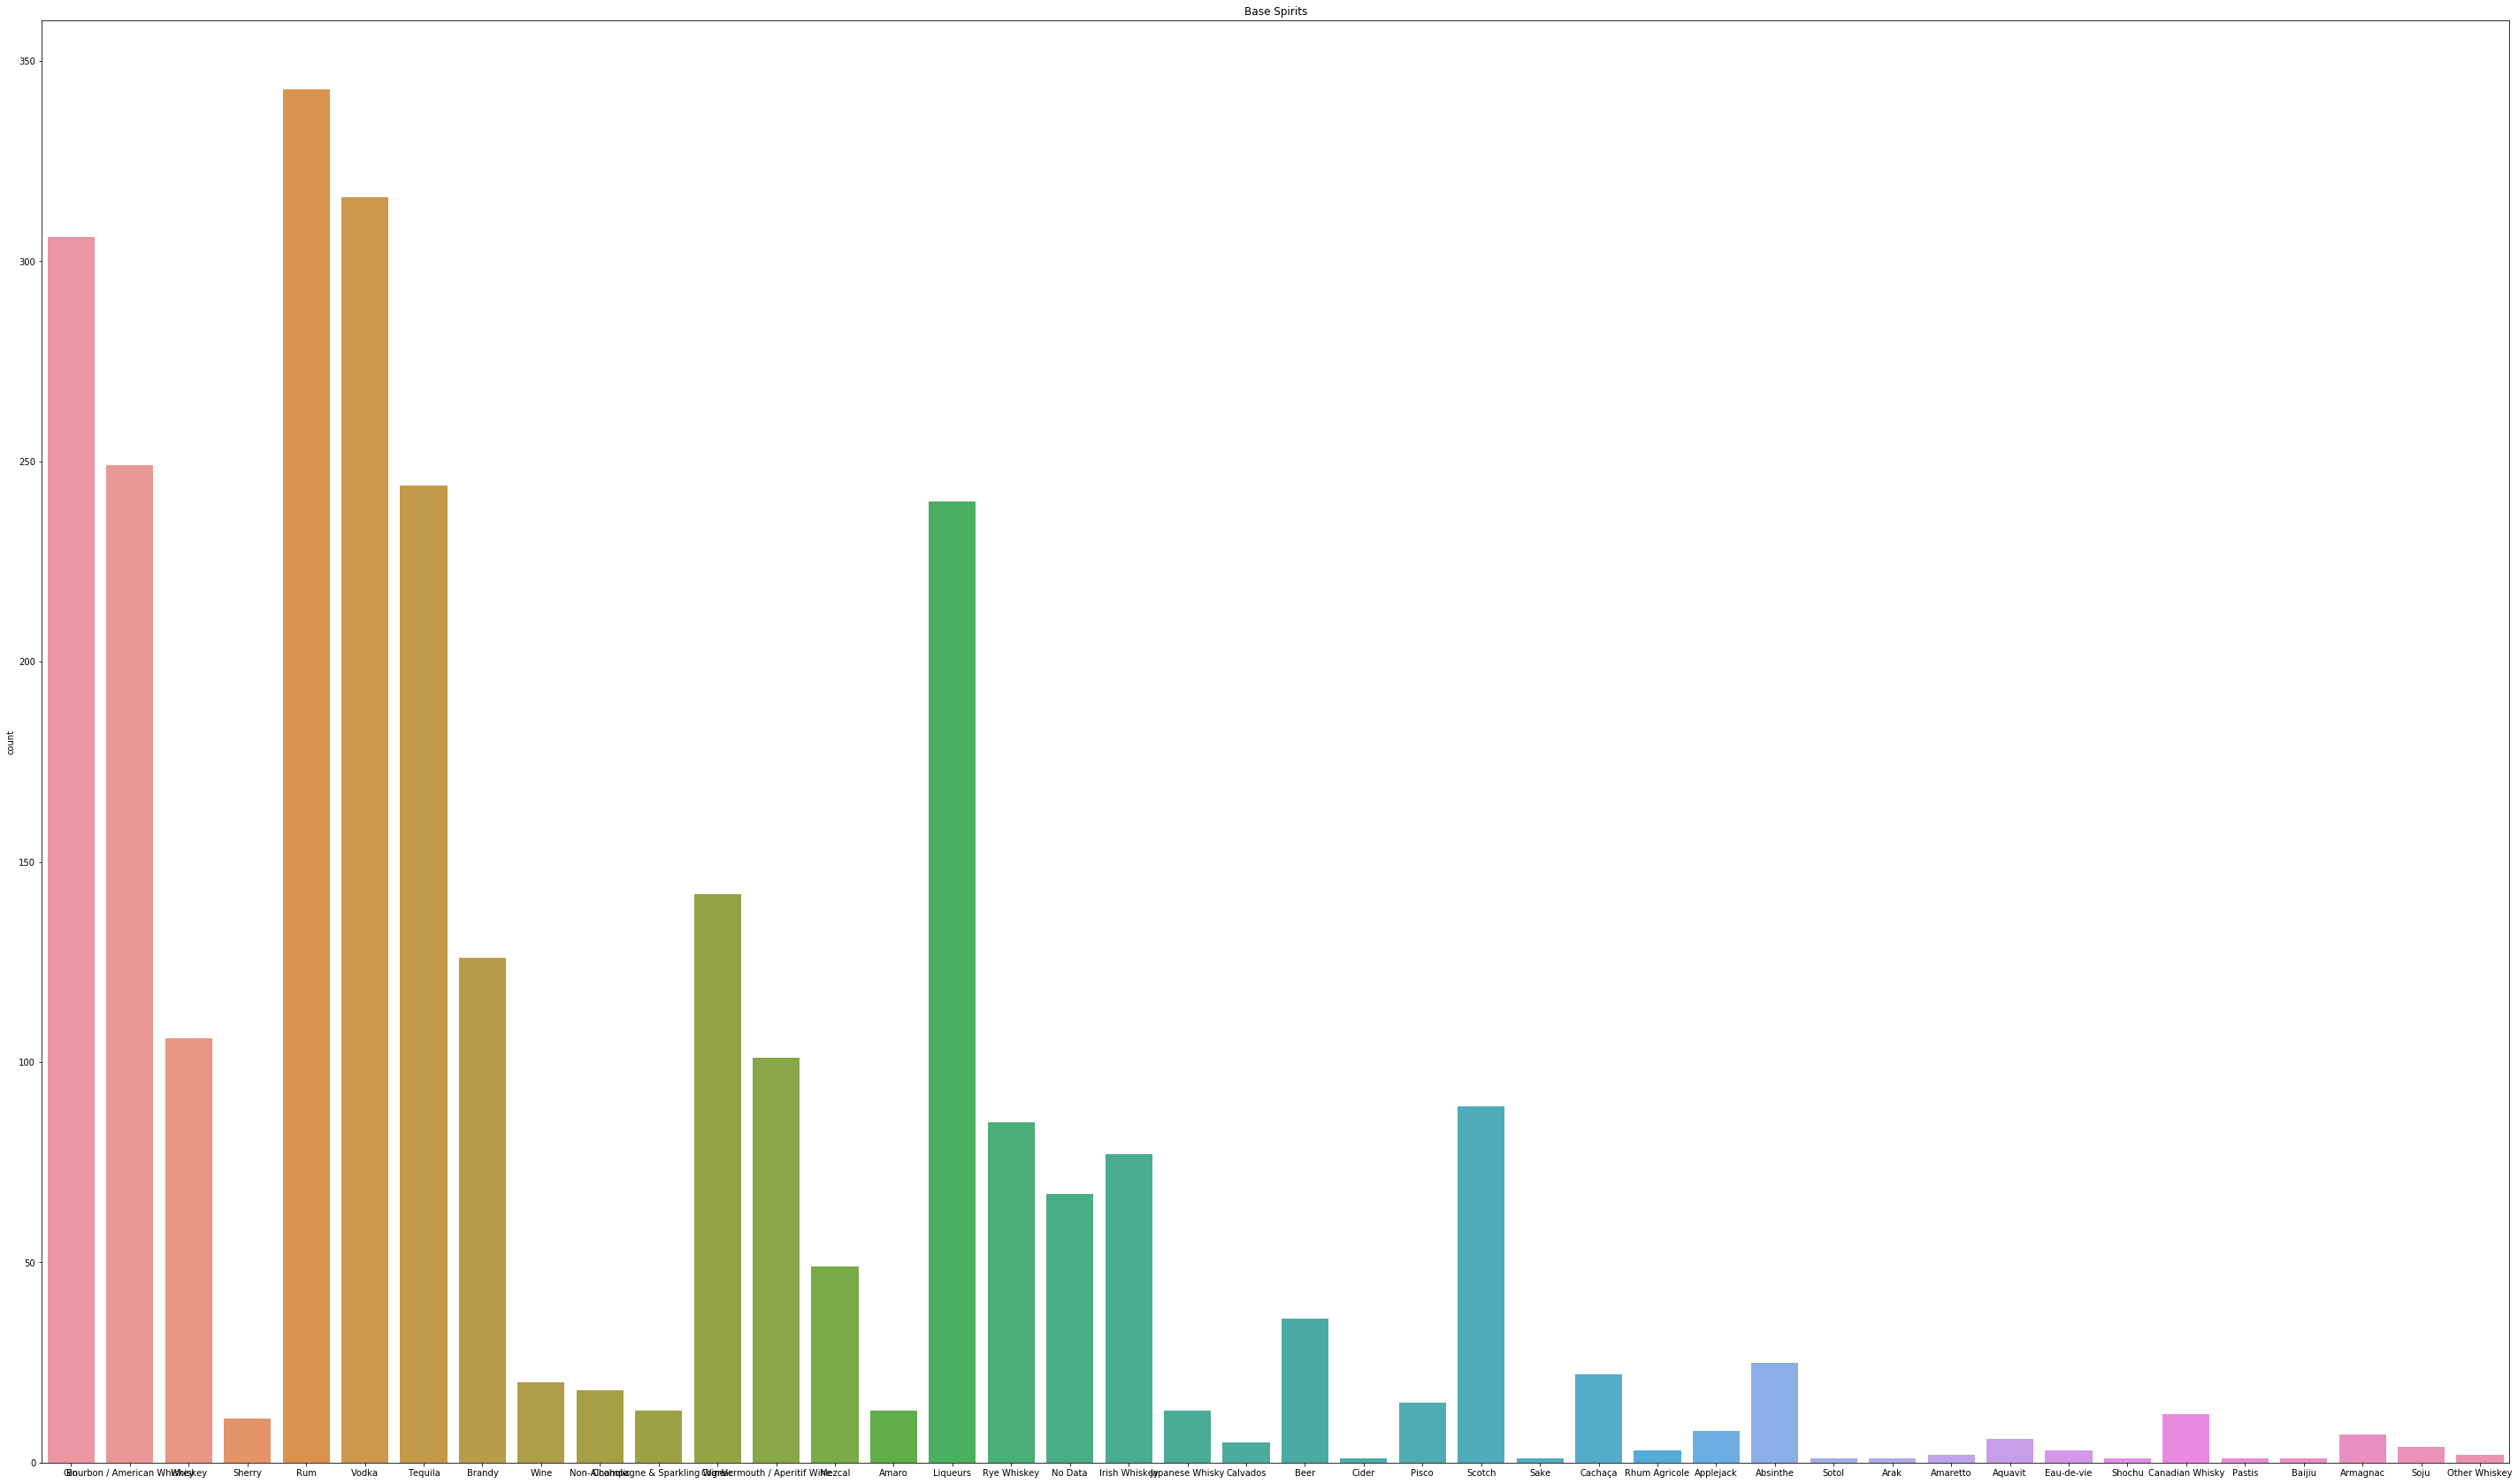

In [18]:
base_spirit = []

for x in df["base"].tolist():
    base_spirit += x
print("There are total {} of base spirits".format(len(set(all_flavs))))

plt.figure(figsize=(50,30))
plt.title("Base Spirits")
sns.countplot(base_spirit)

#### Ingredients

In [19]:
all_ingredient = []
for recipe in df["ingredients"].tolist():
    for ingredient in recipe:
        all_ingredient.append(ingredient.split("@")[-1].strip())

all_ingredient = list(set(all_ingredient))
print(len(all_ingredient))

3730


In [20]:
sorted(all_ingredient)

['(about 3) skinless salmon fillets',
 '(ri)1 Rye Whiskey',
 '(ri)1 Whiskey',
 '*Pecan maple syrup',
 '1-inch piece of ginger, peeled and thinly sliced',
 '1.5 inch Pineapple chunks',
 '10 Cane Rum',
 '10 Cane rum',
 '10-year tawny port',
 '100 percent blue agave silver tequila',
 '100% agave blanco tequila',
 '100-proof Apple brandy',
 '100-proof vodka',
 '12-oz cans of ale (such as Lucky Town pub ale)',
 '12-year-old rum',
 '12.5 oz (half a bottle)\xa0VeeV Açaí S\xad\xadpirit',
 '15-oz cans of black beans',
 '151-proof demerara rum',
 '16.5 oz Chilled water',
 '1738 Accord Royal Rémy Martin Cognac',
 '1888 Brugal rum',
 '1” pineapple chunk',
 '2 oz Spicy Hot Cocoa*',
 '20% saline solution',
 '26–30 shrimp, peeled and deveined',
 '26–30-count shrimp, peeled and deveined',
 '28oz can diced tomatoes',
 '291 Distillery The DECC citrus clove liqueur',
 '3 Muddled pineapple chunks',
 '3-year-old rum',
 '42Below Honey Vodka',
 '46-oz cans of pineapple juice',
 '6-pack of lager',
 '750 ml bo

In [21]:
""" 
 'Coco Lopez coconut cream',
 'Coco Lopez cream of coconut'

 'Coconut milk',
 'Coconut milk (full fat)

 'Coffee bitters',
 'Coffee bitters*

 'Concord grape and jasmine syrup*',
 'Concord grape mint syrup*',
 'Concord grape puree*',
 'Concord grape rosemary syrup*',
 'Concord grape shrub*',
 'Concord grape syrup*',
 'Concord grapes'
 
 
 'Club soda',
 'Club soda or Champagne',
 'Club soda, chilled',
 'Club soda, divided',
 'Club soda, to fill',
 """

" \n 'Coco Lopez coconut cream',\n 'Coco Lopez cream of coconut'\n\n 'Coconut milk',\n 'Coconut milk (full fat)\n\n 'Coffee bitters',\n 'Coffee bitters*\n\n 'Concord grape and jasmine syrup*',\n 'Concord grape mint syrup*',\n 'Concord grape puree*',\n 'Concord grape rosemary syrup*',\n 'Concord grape shrub*',\n 'Concord grape syrup*',\n 'Concord grapes'\n \n \n 'Club soda',\n 'Club soda or Champagne',\n 'Club soda, chilled',\n 'Club soda, divided',\n 'Club soda, to fill',\n "